Raport:
ANALIZA PORÓWNAWCZA

-> rozdziały
-> opracowanie tabel i wykresów
-> wzory i definicje
-> jak długa próba
-> link do próby
-> wnioski i intepretacja
-> wszystkie poznane metody opisu i wizualizacji

Np.:

1) Wstęp: cel, źródło, wykres danych
2) Podst. statystyki: miary położenia, rozproszenia, asymetrii, spłaszczenia oraz interpretacja; miara korelacji (o ile uzasadnione);
3) wizualizacja: histogramy, pudełkowy, dyst. empiryczna, gęstość empiryczna, interpetacja
4) podsumowanie

Link:
https://www.who.int/data/gho/publications/world-health-statistics -> world heatlh statistics
Healthy life expectancy at birth (years) -> Both sexes

Dane:

In [80]:
import pandas as pd
from matplotlib import pyplot as plt

data1_str = "Life expectancy"
data2_str = "Adolescent birth rate"

data = pd.read_excel('whs2022_annex2.xlsx', sheet_name='Annex 2-1', header=None)
data.columns = data.iloc[1]
data = data[5:199]
data = data.iloc[:, [0, 9, 27]].copy() # columns
data.replace('-', float('nan'), inplace=True)
data.replace('<0.1', 0, inplace=True)
data.dropna(inplace=True)
data.columns=["Country/Region", data1_str, data2_str]

data = data.sort_values(by=data1_str, ascending=True)

print(data)

               Country/Region  Life expectancy  Adolescent birth rate
101                   Lesotho             44.2                   90.8
37   Central African Republic             46.4                  184.4
165                   Somalia             49.7                  118.0
63                   Eswatini             50.1                   87.1
121                Mozambique             50.4                  180.0
..                        ...              ...                    ...
49                     Cyprus             72.4                    6.7
173               Switzerland             72.5                    2.0
145         Republic of Korea             73.1                    0.9
161                 Singapore             73.6                    2.1
91                      Japan             74.1                    2.8

[173 rows x 3 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_23440\3020905961.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('-', float('nan'), inplace=True)


Wizualizacja danych:

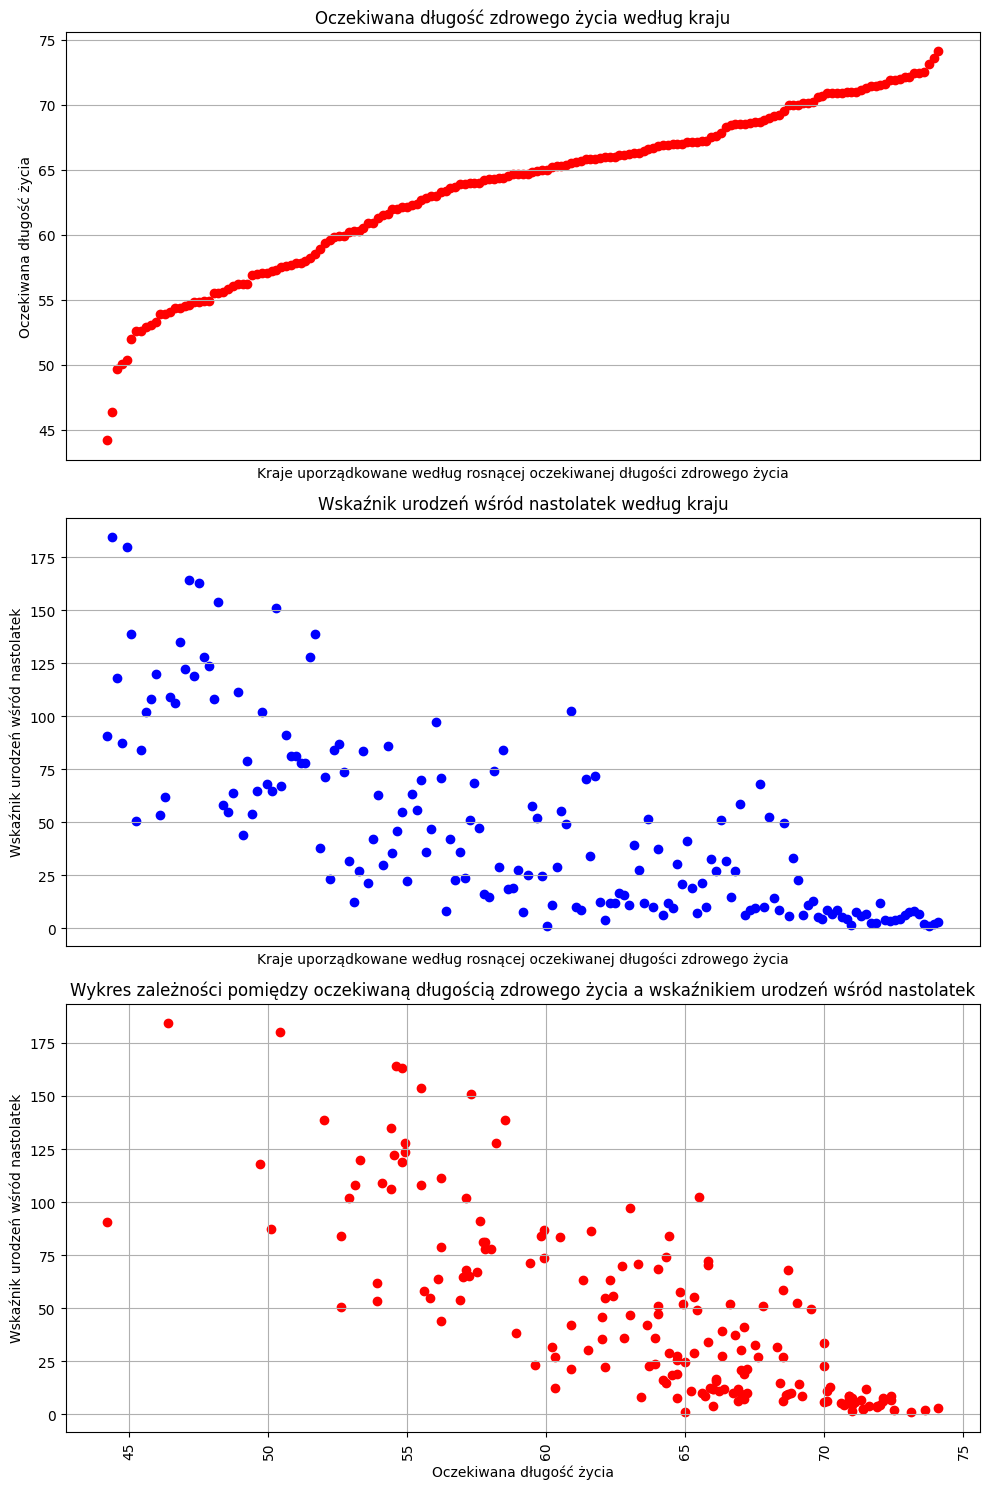

In [81]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.scatter(data['Country/Region'], data[data1_str], color='red')
plt.title("Oczekiwana długość zdrowego życia według kraju")
plt.xlabel('Kraje uporządkowane według rosnącej oczekiwanej długości zdrowego życia')
plt.ylabel("Oczekiwana długość życia")
plt.xticks([], [])
plt.grid(True)

# Plot for Life Expectancy
plt.subplot(3, 1, 2)
plt.scatter(data['Country/Region'], data[data2_str], color='blue')
plt.title("Wskaźnik urodzeń wśród nastolatek według kraju")
plt.xlabel('Kraje uporządkowane według rosnącej oczekiwanej długości zdrowego życia')
plt.ylabel("Wskaźnik urodzeń wśród nastolatek")
plt.xticks([], [])
plt.grid(True)

plt.subplot(3, 1, 3)
plt.scatter(data[data1_str], data[data2_str], color='red')
plt.title('Wykres zależności pomiędzy oczekiwaną długością zdrowego życia a wskaźnikiem urodzeń wśród nastolatek')
plt.xlabel("Oczekiwana długość życia")
plt.ylabel("Wskaźnik urodzeń wśród nastolatek")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


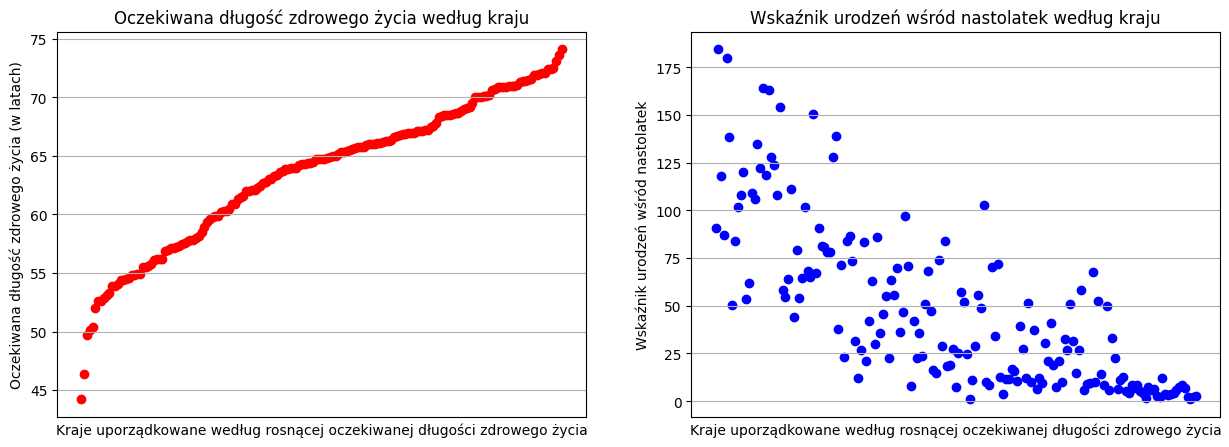

In [91]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['Country/Region'], data[data1_str], color='red')
plt.title("Oczekiwana długość zdrowego życia według kraju")
plt.xlabel('Kraje uporządkowane według rosnącej oczekiwanej długości zdrowego życia')
plt.ylabel("Oczekiwana długość zdrowego życia (w latach)")
plt.xticks([], [])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data['Country/Region'], data[data2_str], color='blue')
plt.title("Wskaźnik urodzeń wśród nastolatek według kraju")
plt.xlabel('Kraje uporządkowane według rosnącej oczekiwanej długości zdrowego życia')
plt.ylabel("Wskaźnik urodzeń wśród nastolatek")
plt.xticks([], [])
plt.grid(True)

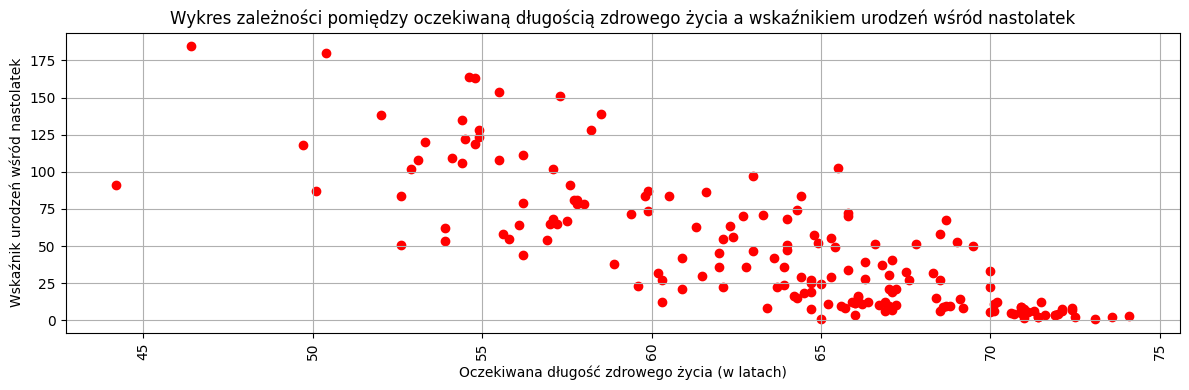

In [90]:
plt.figure(figsize=(12, 4))
plt.scatter(data[data1_str], data[data2_str], color='red')
plt.title('Wykres zależności pomiędzy oczekiwaną długością zdrowego życia a wskaźnikiem urodzeń wśród nastolatek')
plt.xlabel("Oczekiwana długość zdrowego życia (w latach)")
plt.ylabel("Wskaźnik urodzeń wśród nastolatek")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Podst. statystyki: miary położenia, rozproszenia, asymetrii, spłaszczenia oraz interpretacja; miara korelacji (o ile uzasadnione);

In [110]:
import numpy as np
from scipy import stats

def distrChar(proba):
    print("Długość próby: " + str(len(proba)))
    print("Średnia artytmetyczna: " + str(np.mean(proba)))
    print("Średnia geometryczna: " + str(stats.gmean(proba)))
    print("Średnia harmoniczna: " + str(stats.hmean(proba)))
    print("Średnia windsorowska dla 17 (10%): " + str(sr_wins(5, proba)))
    print("Mediana: " + str(np.median(proba)))
    print("Współczynnik skośności: "+str(stats.skew(proba)))
    print("Kurtoza: "+str(stats.kurtosis(proba)))
    print("Kwartyl pierwszy: " + str(np.quantile(proba, 0.25, interpolation="midpoint")))
    print("Kwartyl trzeci: " + str(np.quantile(proba, 0.75, interpolation="midpoint")))
    print("IQR: " + str(stats.iqr(proba, interpolation='midpoint')))
    print("Rozstęp z próby: " + str(np.max(proba)-np.min(proba)))
    print("Wariancja: " + str(np.var(proba, ddof=1)))
    print("Odchylenie standardowe: " + str(np.std(proba, ddof=1)))


def sr_wins(k, data):
    sorted = data.copy()
    sorted.sort()
    n = len(data)
    sr_wins = 1/n*((k+1)*sorted[k]+sum(sorted[k+1:n-k-1])+(k+1)*sorted[n-k])
    return(sr_wins)

In [111]:
life_expectancy_list = data['Life expectancy'].tolist()
print("Dla długości życia: ")
distrChar(life_expectancy_list)
print("\nDla liczby ciąż: ")
adol_birth_rate_list = data['Adolescent birth rate'].tolist()
distrChar(adol_birth_rate_list)

Dla długości życia: 
Długość próby: 173
Średnia artytmetyczna: 63.50173410404625
Średnia geometryczna: 63.184075940173855
Średnia harmoniczna: 62.85116284070653
Średnia windsorowska dla 17 (10%): 63.59132947976879
Mediana: 64.7
Współczynnik skośności: -0.549249594184599
Kurtoza: -0.36564516315997153
Kwartyl pierwszy: 58.5
Kwartyl trzeci: 68.4
IQR: 9.900000000000006
Rozstęp z próby: 29.89999999999999
Wariancja: 38.73307837074875
Odchylenie standardowe: 6.223590472608938

Dla liczby ciąż: 
Długość próby: 173
Średnia artytmetyczna: 47.186127167630055
Średnia geometryczna: 27.291484089382315
Średnia harmoniczna: 12.207173504411667
Średnia windsorowska dla 17 (10%): 46.7913294797688
Mediana: 34.0
Współczynnik skośności: 1.0648661860122621
Kurtoza: 0.49845430693099146
Kwartyl pierwszy: 10.8
Kwartyl trzeci: 71.0
IQR: 60.2
Rozstęp z próby: 183.5
Wariancja: 1828.6723645651296
Odchylenie standardowe: 42.76297890190918


C:\Users\Admin\AppData\Local\Temp\ipykernel_23440\4244859788.py:3: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  distrChar(life_expectancy_list)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23440\4244859788.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  distrChar(adol_birth_rate_list)


WNIOSKI

Korelacja?

scipy.stats is a module in the SciPy library which provides a wide range of statistical functions and tools. This module includes functions for various statistical operations including probability distributions, statistical tests, and measures like correlation.

To calculate correlation using scipy.stats, you can use the pearsonr(), spearmanr(), or kendalltau() functions depending on the type of correlation you want to calculate.

Here's a brief explanation of each:

pearsonr(): Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
spearmanr(): Calculates a Spearman rank-order correlation coefficient and the p-value to test for non-correlation.
kendalltau(): Calculates Kendall's tau, a correlation measure for ordinal data, along with the p-value for testing non-correlation.

Wykresy pudełkowe:

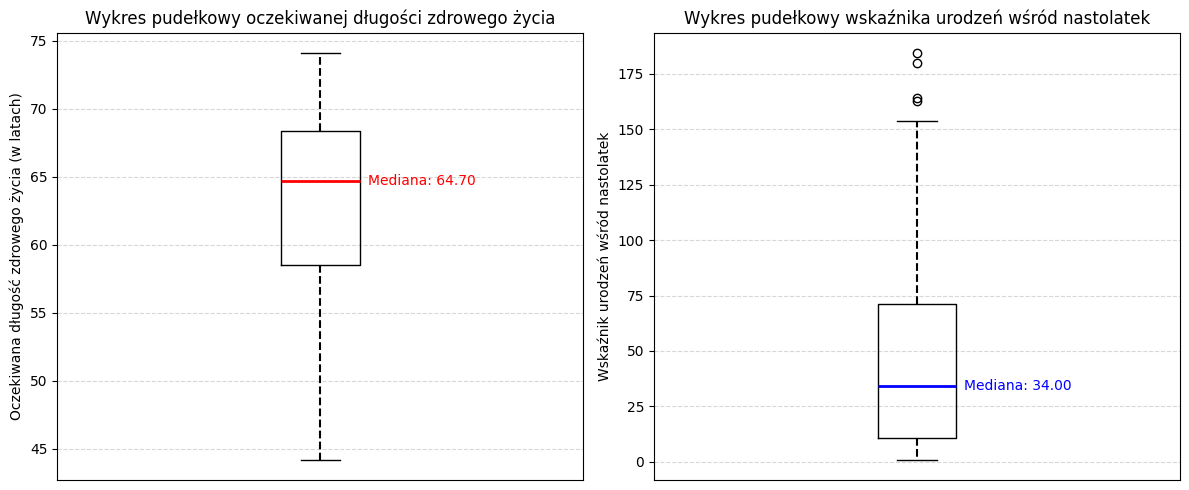

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Wykres 1: Oczekiwana długość zdrowego życia
plt.subplot(1, 2, 1)
plt.boxplot(life_expectancy_list, whiskerprops=dict(linestyle='--', linewidth=1.5), 
            medianprops=dict(color='red', linewidth=2))
median1 = np.median(life_expectancy_list)
plt.annotate(f'Mediana: {median1:.2f}', xy=(1, median1), xytext=(1.09, median1), 
             fontsize=10, color='red', va='center', ha='left', arrowprops=None)
plt.title("Wykres pudełkowy oczekiwanej długości zdrowego życia")
plt.ylabel("Oczekiwana długość zdrowego życia (w latach)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks([])

# Wykres 2: Wskaźnik urodzeń wśród nastolatek
plt.subplot(1, 2, 2)
plt.boxplot(adol_birth_rate_list, whiskerprops=dict(linestyle='--', linewidth=1.5), 
            medianprops=dict(color='blue', linewidth=2))
plt.ylabel("Wskaźnik urodzeń wśród nastolatek")
median2 = np.median(adol_birth_rate_list)
plt.annotate(f'Mediana: {median2:.2f}', xy=(1, median2), xytext=(1.09, median2), 
             fontsize=10, color='blue', va='center', ha='left', arrowprops=None)
plt.title("Wykres pudełkowy wskaźnika urodzeń wśród nastolatek")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks([])

plt.tight_layout()
plt.show()



wnioski

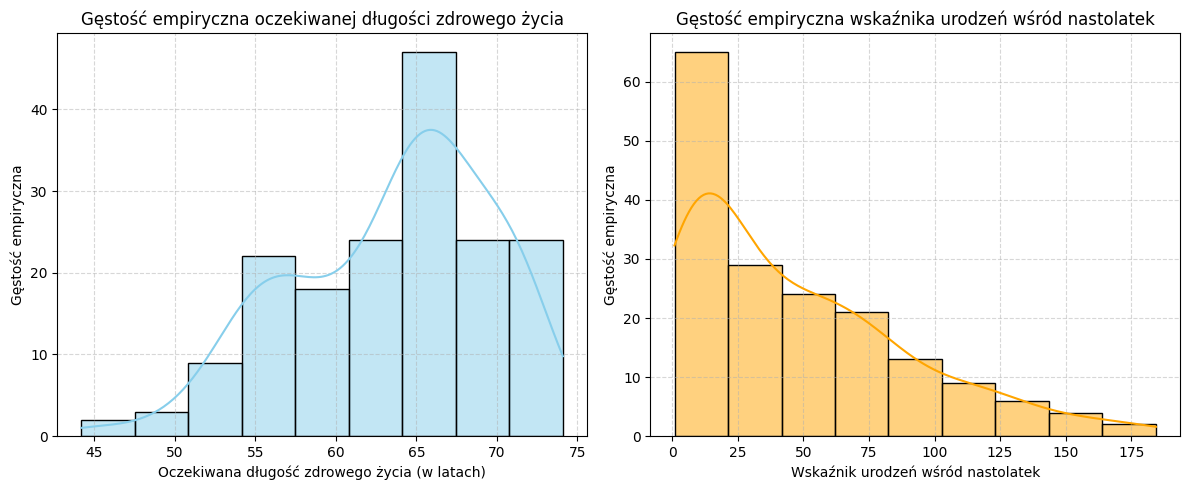

In [117]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Wykres 1: Dystrybuanta empiryczna oczekiwanej długości zdrowego życia
plt.subplot(1, 2, 1)
data_x = life_expectancy_list
sns.ecdfplot(data_x, color='orange', linewidth=2)
plt.xlabel('Oczekiwana długość zdrowego życia (w latach)')
plt.ylabel('Dystrybuanta empiryczna')
plt.title('Dystrybuanta empiryczna oczekiwanej długości zdrowego życia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhspan(0, 1, color='lightgrey', alpha=0.5)

# Wykres 2: Dystrybuanta empiryczna wskaźnika urodzeń wśród nastolatek
plt.subplot(1, 2, 2)
data_y = adol_birth_rate_list
sns.ecdfplot(data_y, color='skyblue', linewidth=2)
plt.xlabel('Wskaźnik urodzeń wśród nastolatek')
plt.ylabel('Dystrybuanta empiryczna')
plt.title('Dystrybuanta empiryczna wskaźnika urodzeń wśród nastolatek')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhspan(0, 1, color='lightgrey', alpha=0.5)

plt.tight_layout()
plt.show()



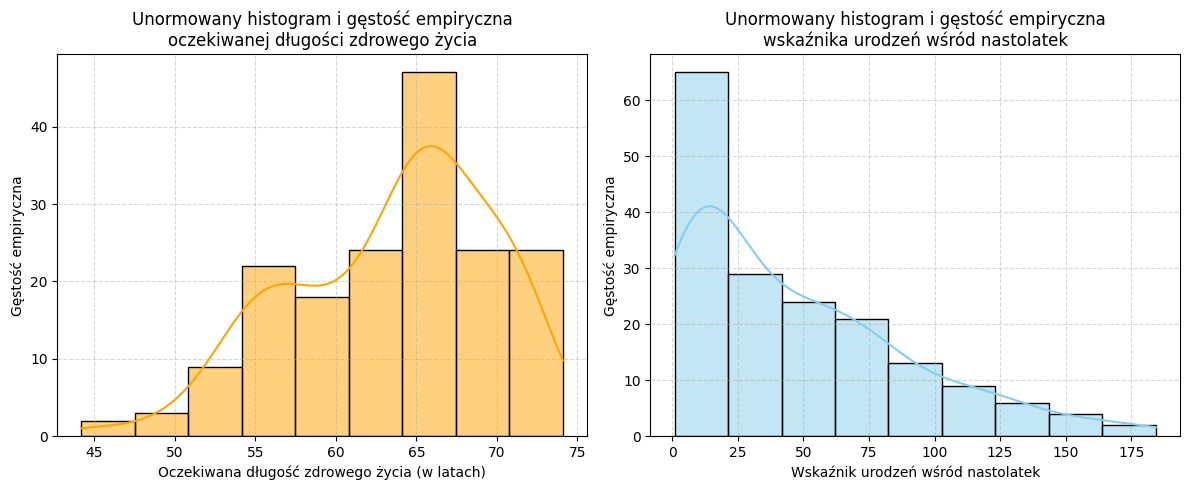

In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Wykres 1: Gęstość empiryczna oczekiwanej długości zdrowego życia
plt.subplot(1, 2, 1)
data_x = life_expectancy_list
sns.histplot(data_x, color='orange', kde=True)
plt.xlabel('Oczekiwana długość zdrowego życia (w latach)')
plt.ylabel('Gęstość empiryczna')
plt.title('Unormowany histogram i gęstość empiryczna\noczekiwanej długości zdrowego życia')
plt.grid(True, linestyle='--', alpha=0.5)

# Wykres 2: Gęstość empiryczna wskaźnika urodzeń wśród nastolatek
plt.subplot(1, 2, 2)
data_y = adol_birth_rate_list
sns.histplot(data_y, color='skyblue', kde=True)
plt.xlabel('Wskaźnik urodzeń wśród nastolatek')
plt.ylabel('Gęstość empiryczna')
plt.title('Unormowany histogram i gęstość empiryczna\nwskaźnika urodzeń wśród nastolatek')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Histogramy:

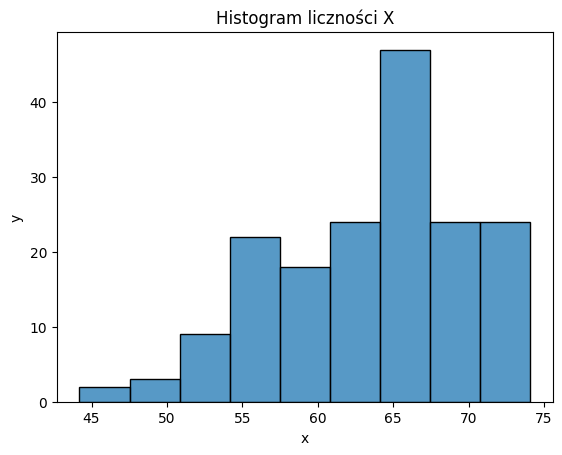

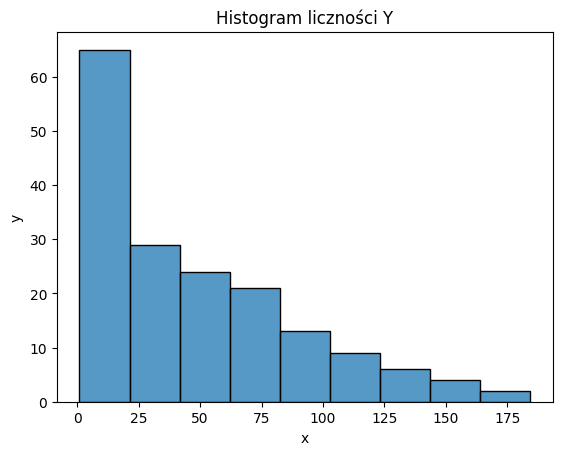

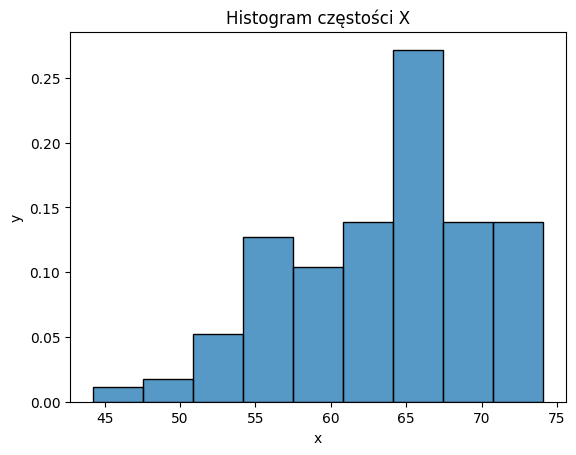

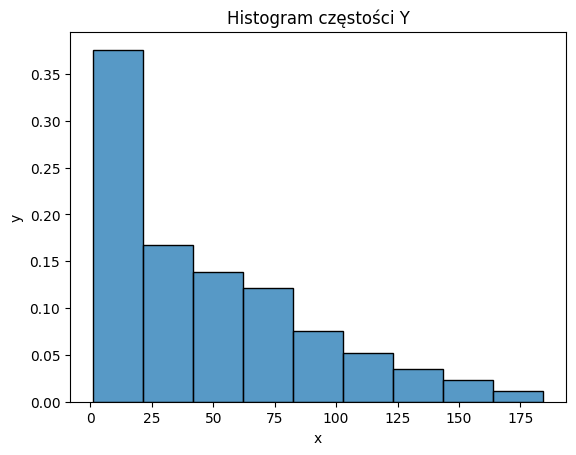

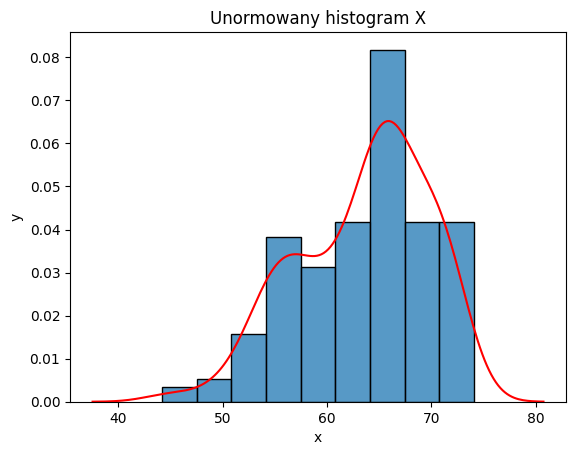

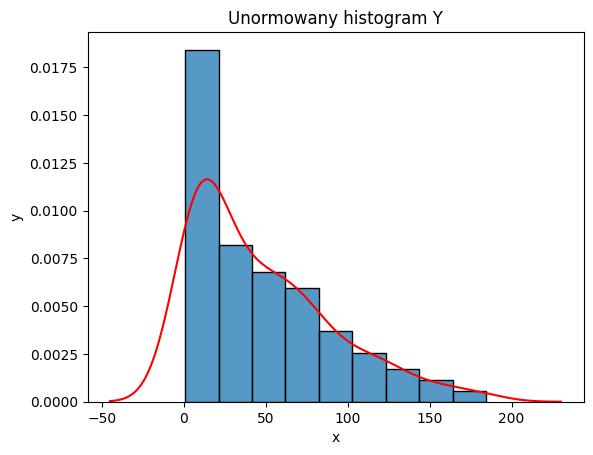

In [ ]:
from seaborn import histplot, kdeplot

dane_x = life_expectancy_list
dane_y = adol_birth_rate_list
xs = np.linspace(-10, 10, 1000)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram liczności X")
histplot(dane_x, stat='count')
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram liczności Y")
histplot(dane_y, stat='count')
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram częstości X")
histplot(dane_x, stat='probability')
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram częstości Y")
histplot(dane_y, stat='probability')

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Unormowany histogram X")
histplot(dane_x, stat='density')
est_gestosc = kdeplot(dane_x, color='r')

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Unormowany histogram Y")
histplot(dane_y, stat='density')
est_gestosc = kdeplot(dane_y, color='r') #TUTAJ TRZEBA COŚ OGARNĄĆ ŻEBY PONIŻEJ 0 NIE BYŁO WYKRESU EST

Macierz kowariancji:

In [ ]:
covariance = np.cov(dane_x, dane_y)
print(covariance)

[[  38.73307837 -212.89427813]
 [-212.89427813 1828.67236457]]


Korelacja:
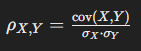

In [ ]:
korelacja = covariance[0, 1]/np.sqrt((np.var(dane_x, ddof=1)*np.var(dane_y, ddof=1)))
print(korelacja)
correlation, _ = stats.pearsonr(dane_x, dane_y)
print("Korelacja Pearsona:", correlation)
#git, wychodzi tak samo

-0.7999356114158486
Korelacja Pearsona: -0.7999356114158482


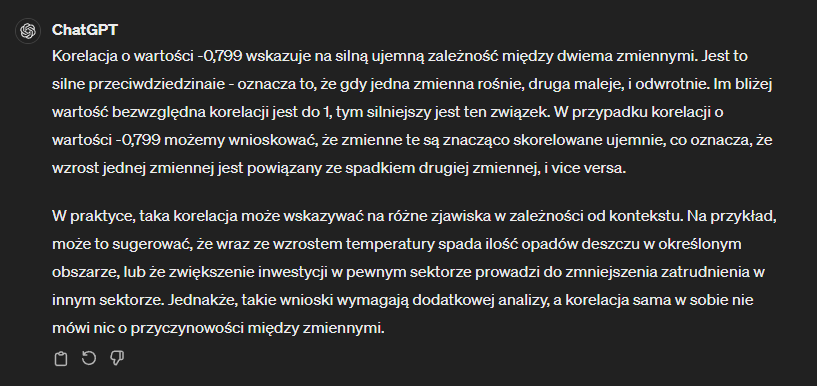

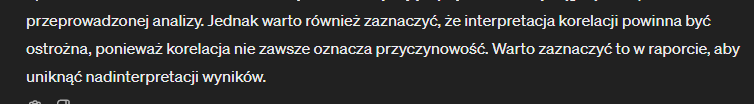

Korelacja Spearmana:
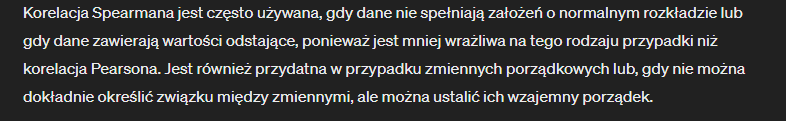

In [ ]:
corr, _ = stats.spearmanr(dane_x, dane_y)
print("Korelacja Spearmana:", corr)

Korelacja Spearmana: -0.8222044270138918


Jeszcze większa korelacja!!

In [ ]:
Teoretycznie mozna dodac regresje liniowa/wykladnicza, ale idk skad wiedziec do czego to przyblizyc i jakie dac warunki poczatkowe